In [31]:
#importing the libraries needed
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
#Preparing the data
month = np.arange(12)
Maxtemp = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
Mintemp =np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
df= pd.DataFrame({'Maxtemp':Maxtemp,'Mintemp':Mintemp,'Month':month})
df.set_index('Month',inplace=True)
df

,Maxtemp,Mintemp
Month,,
0,39,21
1,41,23
2,43,27
3,47,28
4,49,32
5,51,35
6,45,31
7,38,28
8,37,21


Text(0, 0.5, 'Temperature(Degree C)')

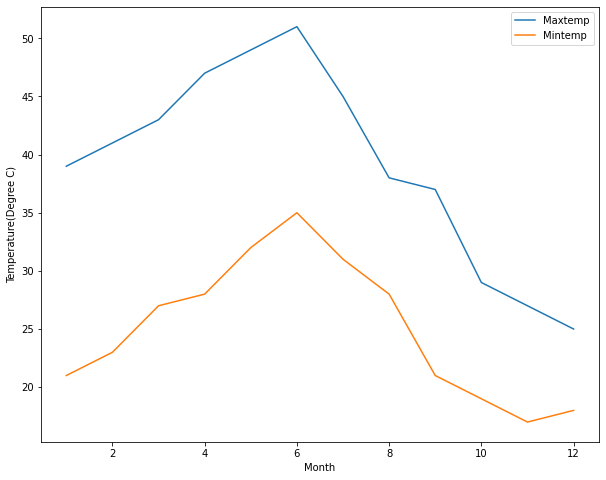

In [34]:
ax = df.plot(figsize=(10,8))
ax.set_xlabel('Month')
ax.set_ylabel('Temperature(Degree C)')


In [37]:
month = np.arange(12)
Maxtemp = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
Mintemp =np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

Text(0, 0.5, 'Temperature')

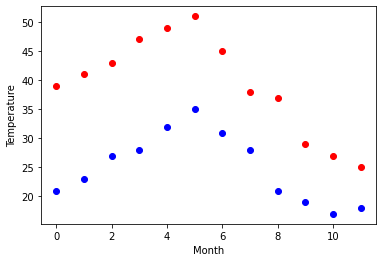

In [39]:
plt.plot(month,Maxtemp,'ro')
plt.plot(month,Mintemp,'bo')
plt.xlabel('Month')
plt.ylabel('Temperature')

In [41]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, month,
                                      Maxtemp, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, month,
                                      Mintemp, [-40, 20, 0])

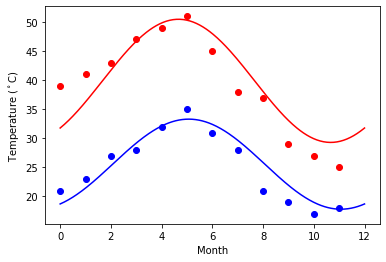

In [43]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(month, Maxtemp, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(month, Mintemp, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()